#### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

In [3]:
class_A=np.random.rand(40,3)*10
class_A_desired = np.ones(40)
class_B=-1*np.random.rand(40,3)*10
class_B_desired = -1*np.ones(40)

In [4]:
train_data = np.concatenate([class_A[:30,:],class_B[:30,:]])
train_desired = np.concatenate([class_A_desired[:30],class_B_desired[:30]])

In [5]:
test_data = np.concatenate([class_A[30:,:],class_B[30:,:]])
test_desired = np.concatenate([class_A_desired[30:],class_B_desired[30:]])

In [6]:
fig = go.Figure(data=go.Scatter3d(
    x=class_A[:30,0],
    y=class_A[:30,1],
    z=class_A[:30,2],
    name='Class A',
    mode='markers',
    marker=dict(
        color = 'blue'
    )
))
fig.add_trace(go.Scatter3d(
    x=class_B[:30,0],
    y=class_B[:30,1],
    z=class_B[:30,2],
    name='Class B',
    mode='markers',
    marker=dict(
        color = 'red'
    )
))

fig.update_layout(height=800, width=800,
                  title='Data Points with Class A and B',
                  scene = dict(xaxis=dict(title='x1'),
                               yaxis=dict(title='x2'),
                               zaxis=dict(title='x3')
                               )
)

fig.show()

In [51]:
def perceptron_algorithm(train_data,train_desired,learning_rate):
    (D,N)=train_data.shape
    w = (np.random.rand(N)-0.5)
    theta=np.random.rand(1)-0.5
    #training
    costs=[]
    errors=[]
    for i in range(D):
        predictions=np.zeros(D)
        for j in range(D):
            u_i = sum(train_data[j,:]*w)
            u_i +=theta[0]
            if u_i>=0:
                y_i=1
            else:
                y_i=-1
            predictions[j]=y_i
        
        costs.append(sum(abs(predictions-train_desired)))


        u_i = sum(train_data[i,:]*w)
        u_i +=theta[0]
        if u_i>=0:
            y_i=1
        else:
            y_i=-1
        
        e_i = train_desired[i] - y_i
        errors.append(e_i)
        theta[0] += learning_rate*e_i
        for j in range(N):
            delta_w_j = learning_rate*e_i*train_data[i,j]
            w[j]=w[j]+delta_w_j

    return w,theta,costs,errors

def perceptron_test(test_data,test_desired,weights,theta):
    (D,N) = test_data.shape

    predictions= np.zeros((D))
    cost = 0
    for j in range(D):
        u_j = sum(test_data[j,:]*weights)
        u_j+=theta[0]

        if u_j>=0:
            y_j=1
        else:
            y_j=-1
            
        predictions[j] = y_j

        cost = cost+abs(test_desired[j] - predictions[j])

    return cost,predictions

In [58]:
w,theta,costs,errors=perceptron_algorithm(train_data,train_desired,0.5)
w

array([1.58609284, 7.04404309, 1.26464867])

In [59]:
theta

array([1.42570001])

In [62]:
x= np.linspace(-10, 10, 100)
y= np.linspace(-10, 10, 100)
z= np.zeros((100,100))
for i in range(100):
    for j in range(100):
        z[i,j]= -x[i]*w[0]/w[2] - y[j]*w[1]/w[2] - theta[0]/w[2]

In [63]:
fig = go.Figure(data=go.Scatter3d(
    x=class_A[:30,0],
    y=class_A[:30,1],
    z=class_A[:30,2],
    name='Class A',
    mode='markers',
    marker=dict(
        color = 'blue'
    )
))
fig.add_trace(go.Scatter3d(
    x=class_B[:30,0],
    y=class_B[:30,1],
    z=class_B[:30,2],
    name='Class B',
    mode='markers',
    marker=dict(
        color = 'red'
    )
))

fig.add_trace(go.Surface(
    x= x,
    y= y,
    z= z,
    name='Decision Plane',
    showscale=False

))

fig.update_layout(height=500, width=800,
                  title='Data Points with Class A and B with Decision Plane',
                  scene = dict(xaxis=dict(title='x1'),
                               yaxis=dict(title='x2'),
                               zaxis=dict(title='x3')
                               )
)

fig.show()

In [64]:
cost,predictions=perceptron_test(test_data,test_desired,w,theta)

In [65]:
new_test= np.concatenate([test_data,predictions.reshape((20,1))],1)
predicted_ones=new_test[new_test[:,3]==1]
predicted_minus_ones=new_test[new_test[:,3]==-1]

In [66]:
fig=go.Figure()


fig.add_trace(go.Scatter3d(
    x=predicted_ones[:,0],
    y=predicted_ones[:,1],
    z=predicted_ones[:,2],
    name='Predicted Class A',
    mode='markers',
    marker=dict(
        color = 'blue'
    )
))

fig.add_trace(go.Scatter3d(
    x=predicted_minus_ones[:,0],
    y=predicted_minus_ones[:,1],
    z=predicted_minus_ones[:,2],
    name='Predicted Class B',
    mode='markers',
    marker=dict(
        color = 'red'
    )
))

fig.add_trace(go.Surface(
    x= x,
    y= y,
    z= z,
    name='Decision Plane',
    showscale=False

))

fig.update_layout(height=500, width=800,
                  
                  title='Predicted Points with Class A and B',
                  scene = dict(xaxis=dict(title='x1'),
                               yaxis=dict(title='x2'),
                               zaxis=dict(title='x3')
                               )
)

fig.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0



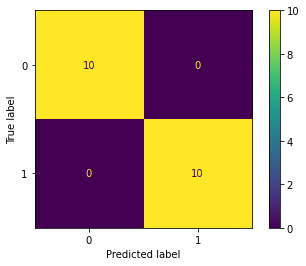

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_desired, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [76]:
np.array(list(range(60)))+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [90]:
fig = go.Figure(data=go.Line(
    x=np.array(list(range(60)))+1,
    y=costs,
    name='Total Cost',
    mode='lines',
    line_shape='spline',
    marker=dict(
        color = 'blue'
    )
))

fig.update_layout(height=800, width=800,
                  showlegend=False,
                  title='Cost Function vs. Iteration Index',
                  xaxis_title='Iteration Index',
                  yaxis_title='Cost')


fig.show()